In [25]:
#imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB


In [45]:
df = pd.read_csv('bug_data.csv')
df.head()
df.dropna(inplace=True)

In [46]:
from sklearn.utils import resample
normal =df[df.severity=='normal']
major =df[df.severity=='major']
minor =df[df.severity=='minor']
blocker =df[df.severity=='blocker']
trivial =df[df.severity=='trivial']
critical =df[df.severity=='critical']
enhancement =df[df.severity=='enhancement']

def resample_df(df):
    return resample(df,replace=True,n_samples=10000)

normal =resample_df(normal)
major =resample_df(major)
minor =resample_df(minor)
blocker =resample_df(blocker)
trivial =resample_df(trivial)
critical =resample_df(critical)
enhancement =resample_df(enhancement)

df = pd.concat([major,critical,minor,blocker])


df.severity.value_counts()


major       10000
critical    10000
minor       10000
blocker     10000
Name: severity, dtype: int64

In [47]:
df.severity.value_counts()
df.shape

(40000, 3)

In [48]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report




In [49]:
# Vectorize text
vectorizer = TfidfVectorizer()

%time X = vectorizer.fit_transform(df['description'])
y = df['severity']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Define the pipeline for text vectorization and SVM classification

text_clf =  SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')



CPU times: user 546 ms, sys: 4 ms, total: 550 ms
Wall time: 552 ms


In [50]:
# Train the model
%time text_clf.fit(X_train, y_train)

# Predict on test data
y_pred = text_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

CPU times: user 9min 31s, sys: 1.6 s, total: 9min 32s
Wall time: 9min 57s
              precision    recall  f1-score   support

     blocker       0.88      0.88      0.88      2004
    critical       0.82      0.73      0.78      2025
       major       0.57      0.62      0.60      1944
       minor       0.70      0.72      0.71      2027

    accuracy                           0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.75      0.74      0.74      8000



In [51]:
#testing for one
%time ip = ["the data is not sufficient"]
ip_dtm = vectorizer.transform(ip)
# ip_tfidf = tfidf_transformer.transform(ip_dtm)
text_clf.predict(ip_dtm)[0]

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11.7 µs


'major'

In [ ]:
#pikcle the model and put into the jar
import pickle
pickle.dump(text_clf, open('pickle_jar/svm_model.pkl', 'wb'))
pickle.dump(vectorizer, open('pickle_jar/svm_vect.pkl', 'wb'))



In [52]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.739625

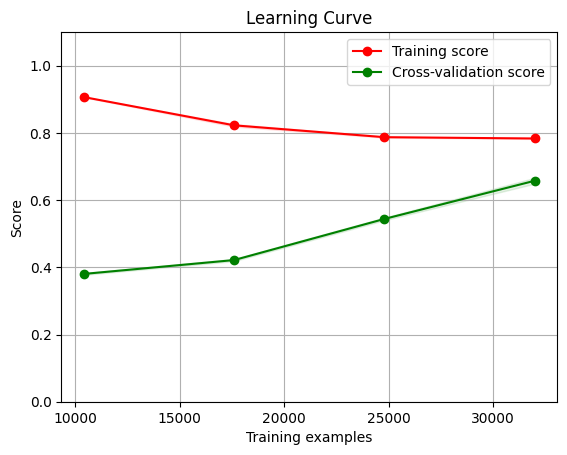

In [54]:
from sklearn.model_selection import learning_curve


# Define your SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Generate the learning curves
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.show()
